**A quick Introduction**

There are data scattered all around everywhere on the internet.


The unique address where any of these resources are located is called the **URL (Uniform/Universal Resource Locator)**. The URLs are references to web resources.



**HTTP (HyperText Transfer Protocol)** is the base of data communication on the web. Whenever we interact with the web, we are trying to get data from it, i.e send http request.


HTTP Request (**GET request**) in plane english means getting data from the web.





# **Scrapping Reddit**

APIs(Application Programming Interface) are bunch of codes that allows two softwares to interact or communicate with each other.

For the purpose of collecting data, you can interact with standard websites using their APIs, e.g, reddits API, twitter API, etc.



**Accessing Reddits API**

In order to gain authentication for reddit API, you need to create a reddit developer app account by visiting https://www.reddit.com/prefs/apps. Then chose 'create app'(if you have not done so before', or 'create another app'(if you have created one before). This will open a form like the one below opens.

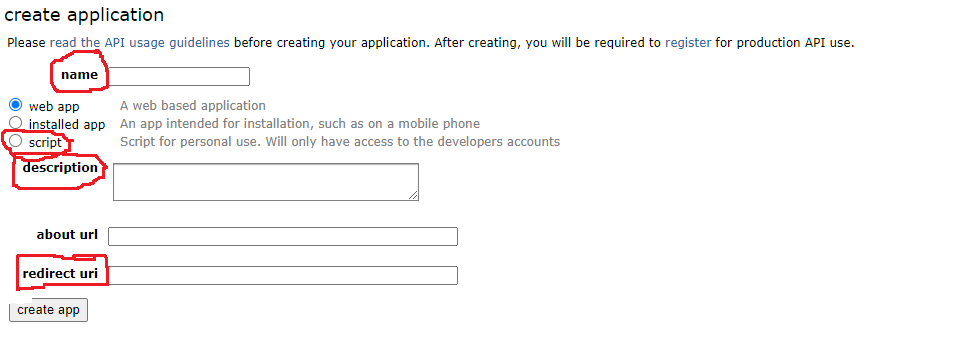

Fill out the form.

**Name** : This is the name you want the app to be called.

Click on **Script**.

**Description**. Give a short description of the app.

**redirect url**: Paste http://localhost:8080 there (don't follow the link, just copy and paste it), as described in PRAW documentation [here](https://praw.readthedocs.io/en/latest/getting_started/authentication.html#script-application).

Click on **create app**.

A new app with details like the one below will come up

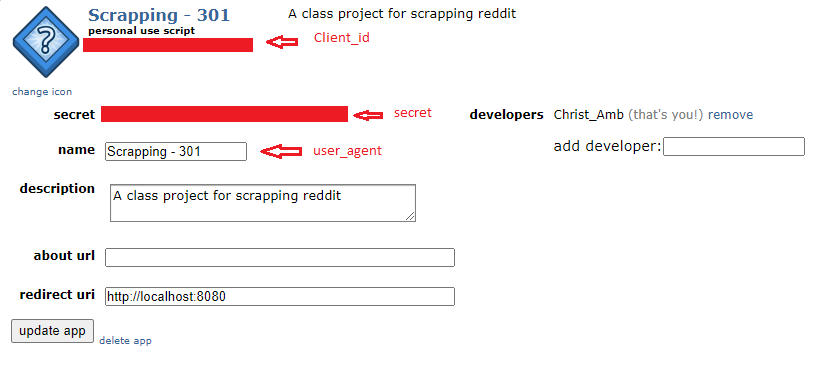

The details of this app will be used to authenticate your access to reddit using praw.

**PRAW** - Python Reddit API Wrapper. It is a python module that is used to collect data from reddit.

In [1]:
#import packages
!pip install praw
import requests
import pandas as pd
import praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.8/188.8 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.5 MB/s eta 0:00:00


# **Scrapping Subreddit**

In [4]:
# Passing your details
reddit = praw.Reddit(client_id='Wc3c-_BxjrU0uVOhAlRZsA', client_secret='ziFeetWMoV8ILNOLTr_B_c6c4sxXkA', user_agent='Scraping - QMSS 301') # Put in your credentials


In [5]:
gw_sub_data = reddit.subreddit('GlobalWarming')    # Now we have our subreddit data in the name 'gw_sub_data'
# https://www.reddit.com/r/GlobalWarming/hot/

In [11]:
# get 10 hot posts from the GlobalWarming subreddit
hot_gw_sub_data = gw_sub_data.hot(limit=10)     # Get the top 10 hot posts from the subreddit
for post in hot_gw_sub_data:                    # Use a for loop to iterate through the post
    print(post.id)                                 # it will print out the objects id. We can get the title by calling .title
                                                # We can also get items such as the score, number of upvotes(ups), downvotes(downs), num_comments etc.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



1173pfk
117n0r8
115f2kn
114ez8f
114i2r3
1109eok
10xtq0l
10xu805
10xkmnw
10xmoge


In [12]:
# In order to skip the sticky posts, we can add a code line to the previous one
hot_gw_sub_data = gw_sub_data.hot(limit=10)
for post in hot_gw_sub_data:
    if not post.stickied:                 # To skip skicky (pinned) posts
        print(post.title)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Was Earth already heating up, or did global warming reverse a long-term cooling trend?
When are we going to die?
As the heart of Dhaka, the Buriganga River is a testament to the resilience and resourcefulness of its people.
Why not vacuum the bad gases from the sky?
NET Power’s zero-emission generators will save the planet and silence the alarmists
10 Impacts of Climate Change on Trekking in Nepal
Climate change will fuel humanitarian crises in 2023 -study
Costs could rise even more in 2023—and thousands of CEOs blame climate change
Glacial lake floods threaten communities in Asia, South America
A solution to the climate crisis: mining the moon, researchers say | The moon


In [16]:
# But we are interested in gathering more information from these posts. One important tool we will need for handling and manipulating the data is pandas
import pandas as pd

more_detail_posts = []                          # Create an empty list
hot_gw_sub_data = gw_sub_data.hot(limit=100)     # Get the top 100 hot posts 
for post in hot_gw_sub_data:                    # Initiate a for-loop
    more_detail_posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created]) # append each detail to the empty list
more_detail_posts = pd.DataFrame(more_detail_posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created']) # Convert to dataframe and name the columns
print(more_detail_posts)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                                title  score       id  \
0   Was Earth already heating up, or did global wa...      8  1173pfk   
1                           When are we going to die?      0  117n0r8   
2   As the heart of Dhaka, the Buriganga River is ...      4  115f2kn   
3          Why not vacuum the bad gases from the sky?      2  114ez8f   
4   NET Power’s zero-emission generators will save...      0  114i2r3   
..                                                ...    ...      ...   
95  Let's discuss Global Warming tonight at 10:30 ...      5   xtkgln   
96  Greenland zombie ice and why we'll get at leas...      7   xs6m8e   
97                       Melt ponds in West Greenland      2   xrwzxn   
98  Are there any countries that are likely to gai...      9   xro3d0   
99                      They're not "climate deniers"     23   xr82y4   

        subreddit                                                url  \
0   GlobalWarming  https://www.shifted.in/2023/02/w

In [17]:
more_detail_posts.head()

,title,score,id,subreddit,url,num_comments,body,created
0,"Was Earth already heating up, or did global wa...",8,1173pfk,GlobalWarming,https://www.shifted.in/2023/02/was-earth-alrea...,5,,1.676890e+09
1,When are we going to die?,0,117n0r8,GlobalWarming,https://www.reddit.com/r/GlobalWarming/comment...,1,I just wonder if i have enough time to invest ...,1.676933e+09
2,"As the heart of Dhaka, the Buriganga River is ...",4,115f2kn,GlobalWarming,https://www.frsthand.com/story/nature-sometime...,0,,1.676726e+09
3,Why not vacuum the bad gases from the sky?,2,114ez8f,GlobalWarming,https://www.reddit.com/r/GlobalWarming/comment...,12,"those methane or dioxide thingy majigs,\n\nits...",1.676625e+09
4,NET Power’s zero-emission generators will save...,0,114i2r3,GlobalWarming,https://www.washingtonexaminer.com/opinion/op-...,5,,1.676633e+09


In [18]:
more_detail_posts.shape     # Check the structure of the data

(100, 8)

In [19]:
more_detail_posts.to_csv('our_reddit_data1.csv', index=True, header=True)

# **Scrapping Multiple Subreddits**

In [20]:
# Passing in your details
reddit = praw.Reddit(client_id= 'Wc3c-_BxjrU0uVOhAlRZsA', 
                client_secret= 'ziFeetWMoV8ILNOLTr_B_c6c4sxXkA', 
                user_agent= 'Scraping - QMSS 301')
                  

In [22]:
# Scrapping the data and convert it to dataframe

subredit_list = ["GlobalWarming", "environment", "Environmentalism"]    # make a list of subreddits we want to scrape the data from
posts = [] # Create an empty list

for sub in subredit_list:                   # Initiate a for-loop for each of the subreddit in the subreddit_list
    sub_data = reddit.subreddit(sub)        # Save the subreddit data in an object called sub_data
    sub_hotpost = sub_data.hot(limit=20)   # Get the top 20 hot posts from the subreddit  # https://praw.readthedocs.io/en/v3.6.2/pages/getting_started.html#:~:text=reddit%20allows%20requests%20of%20up,to%20follow%20the%20api%20guidelines.
    for post in sub_hotpost:                # Another for-loop for each post in the sub_hot post
      posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])     # Append the element of each post to the empty list

posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])                 # Convert the data to dataframe
print(posts.shape)
posts.head()        

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



(60, 8)


,title,score,id,subreddit,url,num_comments,body,created
0,"Was Earth already heating up, or did global wa...",8,1173pfk,GlobalWarming,https://www.shifted.in/2023/02/was-earth-alrea...,5,,1.676890e+09
1,When are we going to die?,0,117n0r8,GlobalWarming,https://www.reddit.com/r/GlobalWarming/comment...,1,I just wonder if i have enough time to invest ...,1.676933e+09
2,"As the heart of Dhaka, the Buriganga River is ...",5,115f2kn,GlobalWarming,https://www.frsthand.com/story/nature-sometime...,0,,1.676726e+09
3,Why not vacuum the bad gases from the sky?,2,114ez8f,GlobalWarming,https://www.reddit.com/r/GlobalWarming/comment...,12,"those methane or dioxide thingy majigs,\n\nits...",1.676625e+09
4,NET Power’s zero-emission generators will save...,0,114i2r3,GlobalWarming,https://www.washingtonexaminer.com/opinion/op-...,5,,1.676633e+09


In [23]:
# Getting the elements of a row (post)
posts.iloc[4]

title           NET Power’s zero-emission generators will save...
score                                                           0
id                                                        114i2r3
subreddit                                           GlobalWarming
url             https://www.washingtonexaminer.com/opinion/op-...
num_comments                                                    5
body                                                             
created                                              1676632940.0
Name: 4, dtype: object

In [25]:
# Getting the elements of a particular cell
posts.iloc[4]['num_comments']

5

In [26]:
# Converting the created date to what we can easily read

from datetime import datetime

posts['date_time'] = pd.to_datetime(posts['created'],  unit='s')    # this passes all the time details, including time. # The unit specify what unit our int is is away from the origin
posts['date'] = posts['date_time'].dt.strftime('%Y-%m-%d') # Now we have created a formatted string, with only the date

posts.head()

,title,score,id,subreddit,url,num_comments,body,created,date_time,date
0,"Was Earth already heating up, or did global wa...",8,1173pfk,GlobalWarming,https://www.shifted.in/2023/02/was-earth-alrea...,5,,1.676890e+09,2023-02-20 10:49:34,2023-02-20
1,When are we going to die?,0,117n0r8,GlobalWarming,https://www.reddit.com/r/GlobalWarming/comment...,1,I just wonder if i have enough time to invest ...,1.676933e+09,2023-02-20 22:45:08,2023-02-20
2,"As the heart of Dhaka, the Buriganga River is ...",5,115f2kn,GlobalWarming,https://www.frsthand.com/story/nature-sometime...,0,,1.676726e+09,2023-02-18 13:15:03,2023-02-18
3,Why not vacuum the bad gases from the sky?,2,114ez8f,GlobalWarming,https://www.reddit.com/r/GlobalWarming/comment...,12,"those methane or dioxide thingy majigs,\n\nits...",1.676625e+09,2023-02-17 09:03:44,2023-02-17
4,NET Power’s zero-emission generators will save...,0,114i2r3,GlobalWarming,https://www.washingtonexaminer.com/opinion/op-...,5,,1.676633e+09,2023-02-17 11:22:20,2023-02-17


In [27]:
posts.shape

(60, 10)

In [28]:
# Remove the duplicate and save data to csv file
posts1 = posts
posts1.drop_duplicates(subset='title', keep='last', inplace=True)
posts1.to_csv('multireddit_data.csv', index=True, header=True)
posts1.shape #view dimension of data to see how many data points remain after cleaning


(60, 10)